In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler as sc

In [3]:
df=pd.read_csv('train.csv')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.shape

(891, 12)

In [7]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1000,E8,S
416,417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.5000,NaN,S
814,815,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.0500,NaN,S
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.2250,NaN,C
673,674,1,2,"Wilhelms, Mr. Charles",male,31.0,0,0,244270,13.0000,NaN,S
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S


In [11]:
df_nodup=df.drop_duplicates()
df_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [12]:
df['Embarked'].astype('category')
df['Survived'].astype('category')
df['Sex'].astype('category')
df['Pclass'].astype('category')


0      3
1      1
2      3
3      1
4      3
5      3
6      1
7      3
8      3
9      2
10     3
11     1
12     3
13     3
14     3
15     2
16     3
17     2
18     3
19     3
20     2
21     2
22     3
23     1
24     3
25     3
26     3
27     1
28     3
29     3
      ..
861    2
862    1
863    3
864    2
865    2
866    2
867    1
868    3
869    3
870    3
871    1
872    1
873    3
874    2
875    3
876    3
877    3
878    3
879    1
880    2
881    3
882    3
883    2
884    3
885    3
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: category
Categories (3, int64): [1, 2, 3]

In [13]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [36]:
df['Embarked'].value_counts()[1]/df['Embarked'].value_counts()[0]

0.2608695652173913

In [4]:
dff=df.drop('Cabin',axis=1)
dff.sample(30)

NameError: name 'df' is not defined

In [5]:
dff.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
dff['Age'].describe()['75%']

38.0

In [8]:
dff['Age'].fillna(dff['Age'].median(),inplace=True)
dff.dropna(inplace=True)

In [9]:
assert dff.notnull().all().all()

In [10]:
dff.to_csv('clean_titanic.csv',index=False)

In [39]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [11]:
dff['Embarked']=dff['Embarked'].astype('category')
dff['Survived']=dff['Survived'].astype('category')
dff['Sex']=dff['Sex'].astype('category')
dff['Pclass']=dff['Pclass'].astype('category')
dff['Name']=dff['Name'].astype('str')
dff['Ticket']=dff['Ticket'].astype('str')


In [12]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null category
Pclass         889 non-null category
Name           889 non-null object
Sex            889 non-null category
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null category
dtypes: category(4), float64(2), int64(3), object(2)
memory usage: 59.4+ KB


In [53]:
dff['Ticket'].value_counts()

347082               7
1601                 7
CA. 2343             7
347088               6
CA 2144              6
3101295              6
S.O.C. 14879         5
382652               5
2666                 4
LINE                 4
4133                 4
349909               4
19950                4
347077               4
PC 17757             4
113760               4
113781               4
17421                4
W./C. 6608           4
C.A. 31921           3
PC 17755             3
371110               3
F.C.C. 13529         3
35273                3
110413               3
239853               3
110152               3
29106                3
363291               3
345773               3
                    ..
W./C. 14258          1
347064               1
349253               1
13568                1
112050               1
C.A. 24580           1
11769                1
28665                1
383121               1
SC/PARIS 2167        1
4138                 1
17463                1
13213      

In [58]:
x=dff['Sex'].unique()
print(x.size/dff["Sex"].size)

0.0022497187851518562


In [13]:
pd.DataFrame({'percent_unique' : dff.apply(lambda x: len(x.unique()) /len(x) *100 ) })

,percent_unique
PassengerId,100.000000
Survived,0.224972
Pclass,0.337458
Name,100.000000
Sex,0.224972
Age,9.898763
SibSp,0.787402
Parch,0.787402
Ticket,76.490439
Fare,27.784027


In [14]:
dff=dff.drop('PassengerId',axis=1)
dff=dff.drop('Name',axis=1)

In [15]:
pd.DataFrame({'missing percent' : dff.isnull().sum()/ len(dff)})

,missing percent
Survived,0.0
Pclass,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0
Embarked,0.0


In [17]:
dff.to_csv('clean_titanic_train.csv',index=False)

In [18]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null category
Pclass      889 non-null category
Sex         889 non-null category
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Ticket      889 non-null object
Fare        889 non-null float64
Embarked    889 non-null category
dtypes: category(4), float64(2), int64(2), object(1)
memory usage: 45.5+ KB


In [3]:
data=pd.read_csv('clean_titanic_train.csv',sep=',')
y=data.filter(['Survived'],axis=1)
x=data.drop('Survived',axis=1)

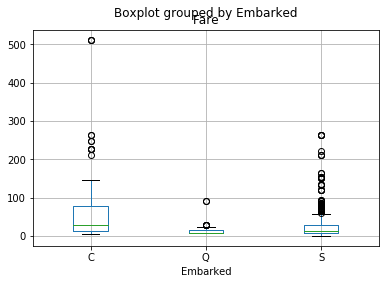

In [11]:
data.boxplot(by='Embarked',column='Fare')

In [14]:
sexmapping={'male':0,'female':1}
embarkedmapping={'C':3,'S':2,'Q':1}
data=data.replace({'Sex':sexmapping,'Embarked':embarkedmapping})

In [33]:
features=data.filter(['Sex','Embarked','Pclass','Fare'],axis=1) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Ticket      889 non-null object
Fare        889 non-null float64
Embarked    889 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


In [27]:
scaler=sc().fit(np.asarray(features),np.asarray(y))
xx_array=scaler.transform(np.asarray(features))
y_array=np.asarray(y)

In [22]:
from sklearn.linear_model import LogisticRegression

In [28]:
paralog={'C':[0.8],'max_iter':[1000]}
gridlog=GridSearchCV(estimator=LogisticRegression()
                     ,param_grid=paralog,scoring=make_scorer(f1_score),cv=4)
glog=gridlog.fit(xx_array,y_array)

C:\Users\eng basel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eng basel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eng basel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eng basel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [29]:
reslog=glog.cv_results_
dflog=pd.DataFrame(reslog)
print(dflog)

   mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0       0.030522         0.001501          0.67667          0.710029     0.8   

  param_max_iter                        params  rank_test_score  \
0           1000  {'C': 0.8, 'max_iter': 1000}                1   

   split0_test_score  split0_train_score  split1_test_score  \
0            0.60241            0.698795           0.754286   

   split1_train_score  split2_test_score  split2_train_score  \
0             0.70217            0.66242               0.724   

   split3_test_score  split3_train_score  std_fit_time  std_score_time  \
0           0.687898            0.715152      0.049977        0.000501   

   std_test_score  std_train_score  
0        0.054496         0.010117  


C:\Users\eng basel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\eng basel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\eng basel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\eng basel\Anaconda3\lib\site-package

In [30]:
paramlp={'alpha':[3,1],'hidden_layer_sizes':[1000]}
scorermlp=make_scorer(f1_score)
gridmlp=GridSearchCV(estimator=MLPClassifier(max_iter=500),param_grid=paramlp,scoring=scorermlp,cv=4)
g=gridmlp.fit(xx_array,np.ravel(y_array))


In [31]:
resmlp=g.cv_results_
dfmlp=pd.DataFrame(resmlp)
print(dfmlp)

   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       2.692917         0.006005         0.678628          0.709381   
1       2.651388         0.010757         0.664589          0.704327   

  param_alpha param_hidden_layer_sizes  \
0           3                     1000   
1           1                     1000   

                                     params  rank_test_score  \
0  {'alpha': 3, 'hidden_layer_sizes': 1000}                1   
1  {'alpha': 1, 'hidden_layer_sizes': 1000}                2   

   split0_test_score  split0_train_score  split1_test_score  \
0           0.608696            0.696907           0.755814   
1           0.518519            0.712329           0.778523   

   split1_train_score  split2_test_score  split2_train_score  \
0            0.697095           0.662420            0.728370   
1            0.677804           0.676259            0.719626   

   split3_test_score  split3_train_score  std_fit_time  std_score_time  \
0     

C:\Users\eng basel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\eng basel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\eng basel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\eng basel\Anaconda3\lib\site-package